In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=16

# $^{222}Rn$

In [8]:
EAM_Rn = [8.211480729123378, 9.208639915953292, 8.514089584350586, 8.322871674882604, 8.150424510874647, 8.526771139591299, 8.307480791781812, 8.621930791976604, 8.220381229481799, 8.403754741587537, 8.480089796350358, 8.563497624498732, 8.175465117109583, 8.29117425959161, 8.963435152743726, 8.061902472313415, 8.142905296163356, 8.604449779429334, 8.200639602985788, 8.299986981331035, 8.248483820164457, 8.127263779335834, 8.297681727307909, 8.25263940527084, 8.225357623810464]

# $^{222}Rn + T$

In [9]:
EAM_RnT_BCN = [8.059945654361806, 8.03970312564931, 8.12277168923236, 8.053294607933532, 8.048365126264857, 8.165090114512342, 8.02081221722542, 8.061697614953873, 8.185345507682637, 8.413906503230967, 8.132826094931744, 8.1881618093937, 8.251170665659803, 8.117733082872755, 8.350974224983378, 7.956330563159699, 8.038048358673745, 8.065417675261802, 8.0369804463488, 8.129734850944356, 8.102025661062687, 8.101720079462579, 8.135596863766933, 8.027808940156977, 8.28533558135337]
EAM_RnT_PMP = [8.048338423383997, 8.061835918020694, 8.010926185770238, 7.947391794082966, 8.436416666558449, 8.059653180710812, 8.212462526686648, 8.13142910409481, 8.318235965485268, 8.11553975369068, 8.016166605847948, 8.170698084729784, 8.160849753846513, 8.226865322031873, 8.555549986819004, 8.194006899569898, 8.282557548360622, 8.095395757796917, 8.102666895440285, 8.380331404665684, 8.062647920973758, 8.130499251345372, 8.203159900421792, 8.082500985328187, 8.104652485948927]
EAM_RnT_ZGZ = [8.344254067603577, 8.07323772349256, 8.18323585834909, 8.246122157320062, 8.079329957353307, 8.133613464680124, 8.202599910979576, 8.189216451441988, 8.144079573610997, 8.356861033338182, 8.205509226372902, 8.233928761583693, 8.160559431035468, 8.25779160032881, 8.249153096625145, 8.072600141484687, 8.264818029200777, 8.10154943263277, 8.342795716955306, 8.31978436733814, 8.241368922781437, 8.261904817946414, 8.259412603175386, 8.172716952384786, 8.345493763051135]
EAM_RnT_HSC = [8.281530583158453, 8.28206115073346, 8.177005159093978, 8.052565513773168, 8.24305834668748, 8.182604972352372, 8.053872169332301, 8.083223383477394, 8.251345898242707, 8.172950541719477, 8.06568088937313, 8.290624862021588, 8.129040657205785, 8.125324898577752, 7.993029979949302, 8.35301245019791, 8.3312279315705, 8.177043387230407, 7.969878988063082, 8.030435237478702, 8.054201572499377, 8.09184658781011, 8.273422038301508, 8.114550732551738, 8.039057264936732]

In [10]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

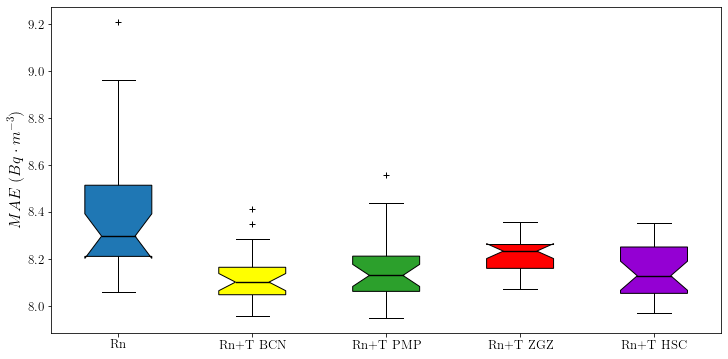

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
fig.savefig('../Figures/CNN/MAE_Boxplot.png', dpi=300)

# Kruskal-Wallis
En estadística, la prueba de Kruskal-Wallis (de William Kruskal y W. Allen Wallis) es un método no paramétrico para probar si un grupo de datos proviene de la misma población. Intuitivamente, es idéntico al ANOVA con los datos reemplazados por categorías. Es una extensión de la prueba de la U de Mann-Whitney para 3 o más grupos.

Ya que es una prueba no paramétrica, la prueba de Kruskal-Wallis no asume normalidad en los datos, en oposición al tradicional ANOVA. Sí asume, bajo la hipótesis nula, que los datos vienen de la misma distribución. Una forma común en que se viola este supuesto es con datos heterocedásticos. 

In [12]:
print('Kruskal Wallis between BCN and PMP :', kruskalwallis(X[1], X[2]))
print('Kruskal Wallis between BCN and ZGZ :', kruskalwallis(X[1], X[3]))
print('Kruskal Wallis between BCN and HSC :', kruskalwallis(X[1], X[4]))

Kruskal Wallis between BCN and PMP : KruskalResult(statistic=1.2017882352940887, pvalue=0.27296456041325035)
Kruskal Wallis between BCN and ZGZ : KruskalResult(statistic=11.33261176470586, pvalue=0.0007615771424191868)
Kruskal Wallis between BCN and HSC : KruskalResult(statistic=0.9984941176470556, pvalue=0.31767516186993683)


In [13]:
print('Kruskal Wallis between PMP and ZGZ :', kruskalwallis(X[2], X[3]))
print('Kruskal Wallis between PMP and HSC :', kruskalwallis(X[2], X[4]))

Kruskal Wallis between PMP and ZGZ : KruskalResult(statistic=4.764705882352928, pvalue=0.029049022161940746)
Kruskal Wallis between PMP and HSC : KruskalResult(statistic=0.011388235294106153, pvalue=0.9150145467573126)


In [14]:
print('Kruskal Wallis between ZGZ and HSC :', kruskalwallis(X[3], X[4]))

Kruskal Wallis between ZGZ and HSC : KruskalResult(statistic=4.350588235294111, pvalue=0.03699616569833828)


In [15]:
print('Kruskal Wallis between the 4 cities :', kruskalwallis(X[:-1]))

Kruskal Wallis between the 4 cities : KruskalResult(statistic=28.093259405940614, pvalue=3.471958694804895e-06)


# V2

In [16]:
EAM_Rn = [7.957026462928922, 8.829230102838254, 8.82228993434532, 6.7291641609341495, 6.484147202734854, 5.728721543854358, 5.414373622221105, 7.374995474721871, 6.4537142959295535, 6.119189168892655, 6.428095163083544, 6.986444211473652, 6.054645800123028, 6.072771857766544, 6.662684571509268, 6.567270914713542, 5.728116802140778, 7.062237459070542, 5.830522238039503, 6.155300514370787, 5.328276391122856, 7.665476742912741, 5.856595768648035, 5.921784008250517, 5.988234950046913]

In [17]:
EAM_RnT_BCN = [6.640592799467199, 6.752361484602386, 6.566429212981579, 6.554271884993011, 6.9334148332184435, 6.43499542685116, 6.239002003389246, 6.307730356852214, 7.460333805458219, 6.3705578972311585, 7.211331049601237, 6.353525273940143, 7.63083719739727, 5.979975868673885, 7.167679132199755, 6.882324742335899, 6.720657124238856, 7.014494091856713, 6.546930761898265, 5.959228889614928, 7.437941644705978, 7.236246333402746, 8.616805506687538, 6.123318990071614, 6.908850838156307]
EAM_RnT_PMP = [6.476646572935815, 7.264290716133866, 6.505566802679324, 6.383237389957204, 6.750935573203891, 7.284977520213408, 5.924745447495404, 6.889391469020469, 6.627223033531039, 6.254274480483112, 6.670552571614583, 7.322537553076651, 6.574525010352041, 6.420104419483858, 6.96022071090399, 7.448443244485294, 6.677722930908203, 7.0180017059924555, 6.923133401309743, 7.26979969997032, 6.111400604248047, 8.436556348613664, 6.069889106002509, 6.6524842954149435, 6.3160067539589075]
EAM_RnT_ZGZ = [6.371614680570715, 7.137910768097522, 6.813130210427677, 7.286964154710956, 6.670178993075502, 6.076452816233916, 6.731590009203144, 6.451763377470129, 6.157823899213006, 7.731760286817364, 6.461606792375153, 6.544927073459999, 6.903651256187289, 6.4203742906159045, 8.103279861749387, 6.691247117285635, 7.099449008118873, 6.493941250969382, 5.922455581964231, 6.738455080518536, 6.706917183071959, 5.8234495649150775, 6.682252996108112, 6.471171696980794, 6.505207585353477]
EAM_RnT_HSC = [8.51159106983858, 6.356553208594229, 6.953885396321614, 6.330532859353458, 6.585010042377546, 6.8170348148719935, 6.678549074659161, 6.478125852697036, 6.39091895608341, 8.424645255593692, 6.427627675673541, 6.0703196432076245, 6.470955343807445, 6.181999917123832, 7.187143587598614, 7.406943040735581, 6.428633521584904, 6.136665830425188, 7.082850400139304, 6.28369888604856, 6.237776326198204, 6.5261895422841985, 7.044385087256338, 5.876008763032801, 6.137154223872166]

In [19]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

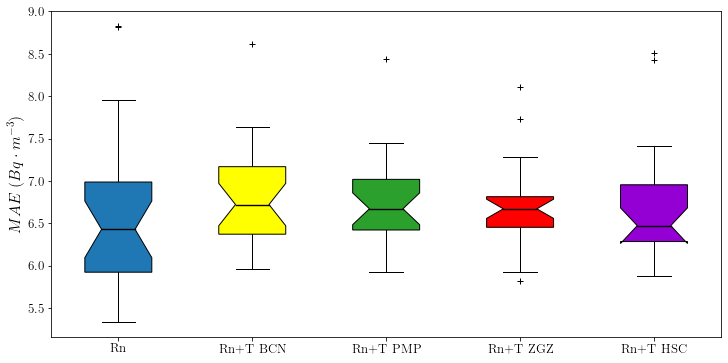

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
fig.savefig('../Figures/CNN/MAE_Boxplot_v2.png', dpi=300)

In [24]:
print('Kruskal Wallis between BCN, PMP, HSC, ZGZ :', kruskalwallis(X[1], X[2], X[3], X[4]))

Kruskal Wallis between BCN, PMP, HSC, ZGZ : KruskalResult(statistic=1.9782178217821524, pvalue=0.576939964052124)


In [37]:
print('Wilcoxon between Rn and PMP', wilcoxon(X[0], X[2]))

Wilcoxon between Rn and PMP WilcoxonResult(statistic=94.0, pvalue=0.06531098743285503)


In [26]:
DF = pd.DataFrame({'Rn': EAM_Rn,
                  'BCN': EAM_RnT_BCN,
                  'PMP': EAM_RnT_PMP,
                  'ZGZ': EAM_RnT_ZGZ,
                  'HSC': EAM_RnT_HSC})

In [30]:
DF.describe()

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.568852,6.801993,6.769307,6.679903,6.681008
std,0.945071,0.596355,0.542652,0.512125,0.656250
min,5.328276,5.959229,5.924745,5.823450,5.876009
25%,5.921784,6.370558,6.420104,6.451763,6.283699
50%,6.428095,6.720657,6.670553,6.670179,6.470955
75%,6.986444,7.167679,7.018002,6.813130,6.953885
max,8.829230,8.616806,8.436556,8.103280,8.511591
